In [9]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries
from pylab import *

In [10]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('bearings.csv', 50, True)
print(len(X_train))
print(len(y_test))
axis = range(1,len(y_test)+1)

705
635
70


In [11]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

('compilation time : ', 0.03869199752807617)


In [12]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=50,
    nb_epoch=1,
    validation_split=0.05)

Train on 603 samples, validate on 32 samples
Epoch 1/1
603/603 [==============================] - 5s 9ms/step - loss: 33.5266 - val_loss: 26.4927


In [17]:
#Step 4 - Plot the predictions!
preds = lstm.predict_point_by_point(model, X_test)

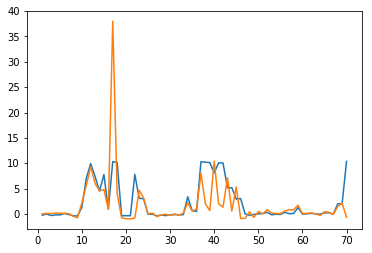

In [18]:
plot(axis,preds)
plot(axis,y_test)
show()